In [4]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
from IPython import display

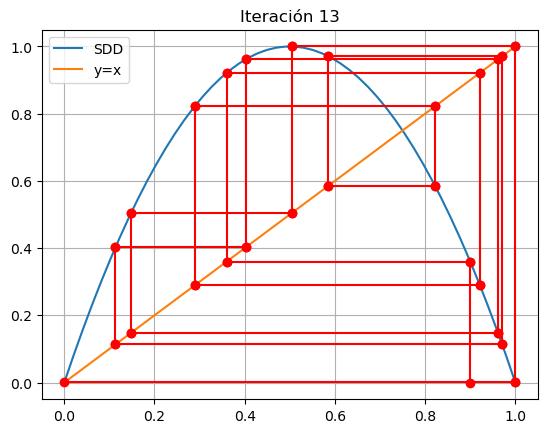

In [84]:
def functions(m):
    # Definimos el rango de la preimagen del sistema que queremos plotear.
    xmin = 0 
    xmax = 1
    x_ax = np.linspace(xmin, xmax)

    # Calculamos la imagen del sistema.
    y_ax = []
    for i in x_ax:
        y_ax.append(m * i * (1 - i))
    
    # Ploteamos el sistema y la función identidad.
    plt.plot(x_ax, y_ax)
    plt.plot(x_ax, x_ax)
    return 0

def calcDynamicSystem(m, it, x0):
    # Definimos una tolerancia, el numero de iteraciones y el vector de los resultados de las iteraciones.
    tol = 1e-3
    x = np.empty(it)
    x[:] = np.nan
    x[0] = x0
    x[1] = m * x[0] * (1 - x[0])
    # Calculamos las siguientes iteraciones.
    for i in range(1, it - 1):
        x[i + 1] = m * x[i] * (1 - x[i])
        if (abs(x[i] - x[i + 1]) < tol):
            break
    return x, i

def pause(t):
    display.display(plt.gcf())
    display.clear_output(wait = True)
    sleep(t)
    return 0

def plotDynamicSystem(x, n):
    plt.title("Iteración 1")
    plt.plot([x[0], x[0]], [0, x[1]], 'r-o')
    pause(0.1)
    plt.plot([x[0], x[1]], [x[1], x[1]], 'r-o')
    pause(0.1)
    for i in range(1, n):
        plt.title(f"Iteración {i + 1}")
        plt.plot([x[i], x[i]], [x[i], x[i + 1]], 'r-o')
        pause(0.1)
        plt.plot([x[i], x[i + 1]], [x[i + 1], x[i + 1]], 'r-o')
        pause(0.1)
    return 0

# m = input("Ingrese el valor de mu")
# x0 = input("Ingrese la condición inicial")
m = 4
x0 = 0.9
it = 50

functions(m)
x, n = calcDynamicSystem(m, it, x0)
plt.xlim([min(x) - 0.05, max(x) + 0.05])
plt.ylim([min(x) - 0.05, max(x[1:]) + 0.05])
plt.legend(["SDD", "y=x"])
plt.grid()
plotDynamicSystem(x, n)
plt.show()